In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import qeds

url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates = ["Date"])
unemp_raw.head()

unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

def z_score(x):
    mu = x.mean()
    sigma = x.std()
    return (x-mu)/sigma

unemp_z = unemp_all.apply(z_score)
unemp_z_abs = unemp_z.abs()
unemp_z_abs.head()

def idxmax(x):
    return x.idxmax()

unemp_z_abs.idxmax()


state
Alabama          2009-10-01
Alaska           2009-08-01
Arizona          2009-11-01
Arkansas         2011-01-01
California       2010-03-01
Colorado         2010-09-01
Connecticut      2000-08-01
Delaware         2010-01-01
Florida          2010-01-01
Georgia          2010-02-01
Hawaii           2009-05-01
Idaho            2009-06-01
Illinois         2009-12-01
Indiana          2010-01-01
Iowa             2009-05-01
Kansas           2009-08-01
Kentucky         2009-06-01
Louisiana        2005-09-01
Maine            2009-06-01
Maryland         2010-01-01
Massachusetts    2009-12-01
Michigan         2009-06-01
Minnesota        2009-05-01
Mississippi      2010-02-01
Missouri         2010-01-01
Montana          2010-02-01
Nebraska         2010-01-01
Nevada           2010-09-01
New Hampshire    2009-05-01
New Mexico       2010-05-01
New York         2009-11-01
New jersey       2009-11-01
North Carolina   2010-01-01
North Dakota     2009-04-01
Ohio             2010-01-01
Oklahoma      

In [40]:
unemp = unemp_all
unemp.min(axis=1)

Date
2000-01-01    2.4
2000-02-01    2.4
2000-03-01    2.4
2000-04-01    2.4
2000-05-01    2.3
             ... 
2017-08-01    2.2
2017-09-01    2.2
2017-10-01    2.1
2017-11-01    2.1
2017-12-01    2.1
Length: 216, dtype: float64

In [42]:
unemp.median()

state
Alabama           5.90
Alaska            7.00
Arizona           5.80
Arkansas          5.50
California        6.50
Colorado          5.20
Connecticut       5.30
Delaware          4.50
Florida           5.35
Georgia           5.30
Hawaii            4.10
Idaho             5.00
Illinois          6.15
Indiana           5.30
Iowa              4.20
Kansas            4.90
Kentucky          5.70
Louisiana         6.10
Maine             4.80
Maryland          4.40
Massachusetts     5.10
Michigan          7.00
Minnesota         4.50
Mississippi       6.60
Missouri          5.50
Montana           4.60
Nebraska          3.60
Nevada            5.65
New Hampshire     3.80
New Mexico        6.00
New York          5.70
New jersey        5.40
North Carolina    5.90
North Dakota      3.20
Ohio              5.80
Oklahoma          4.60
Oregon            6.85
Pennsylvania      5.45
Rhode island      5.40
South Carolina    6.60
South Dakota      3.40
Tennessee         5.60
Texas             5.40
Utah 

In [59]:
unemp_max = unemp.max()
max_unemp = unemp_max.idxmax()
print(max_unemp)
Michigan = unemp[max_unemp]
print(Michigan.idxmax())

Michigan
2009-06-01 00:00:00


In [66]:
var = unemp.var()
print(var)

def high_low(x):
    if x > 4:
        return "High"
    else:
        return "Low"

var.apply(high_low)
worst_state = var.idxmax()
var[worst_state]

state
Alabama            4.548286
Alaska             0.257506
Arizona            4.179021
Arkansas           1.957209
California         6.039162
Colorado           3.449818
Connecticut        3.674742
Delaware           2.779145
Florida            5.780556
Georgia            5.011162
Hawaii             2.265971
Idaho              3.397612
Illinois           3.846785
Indiana            4.685977
Iowa               0.942789
Kansas             1.076341
Kentucky           3.402510
Louisiana          1.469891
Maine              2.558667
Maryland           1.930448
Massachusetts      2.291571
Michigan           6.817340
Minnesota          1.676511
Mississippi        2.724155
Missouri           2.913183
Montana            1.253705
Nebraska           0.340393
Nevada            10.002977
New Hampshire      1.170149
New Mexico         1.538129
New York           2.293530
New jersey         3.987372
North Carolina     4.847969
North Dakota       0.174066
Ohio               3.296091
Oklahoma      

10.002976744186048

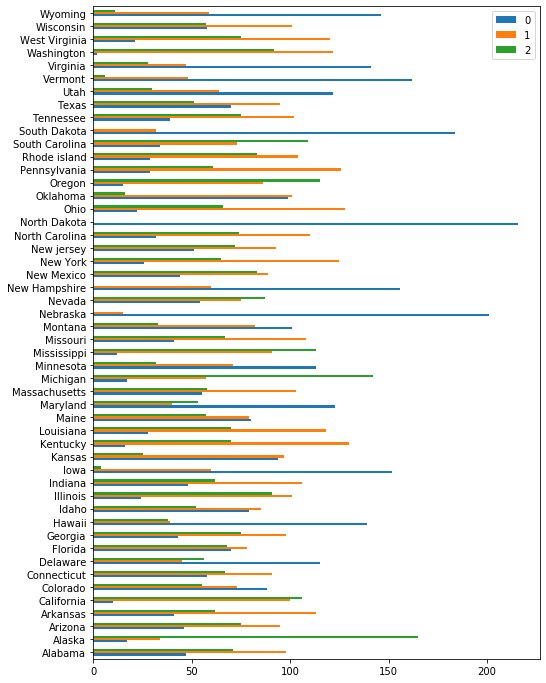

In [96]:
def categories(x):
    if x > 6.5:
        return "High"
    elif 4.5 < x < 6.5:
        return "Medium"
    else:
        return "Low"

unemp_bins = unemp.applymap(categories)

def counts(x):
    low = 0
    medium = 0
    high = 0
    for i in x:
        if i == "High":
            high += 1
        elif i == "Medium":
            medium += 1
        else:
            low += 1
    return [low,medium,high]
states = list(unemp_bins.columns)

unemp_categories = unemp_bins.agg(counts)
Data = pd.DataFrame((i for i in unemp_categories), index = states)
Data.rename(columns = {0:'Low',1:'Medium',2:'High'})
Data.plot.barh(figsize = (8,12))

In [124]:
unemp_bins
unemp_dates = unemp_bins.agg(counts, axis = 1)
unemp_dates
time = list(unemp_bins.index)
Datum = pd.DataFrame((i for i in unemp_dates), index = time )
Datum.rename(columns = {0:'Low',1:'Medium',2:'High'}, inplace = True)

print(Datum['High'].idxmax())
print(Datum['High'].max())
print(Datum['Medium'].idxmax())
print(Datum['Medium'].max())
print(Datum['Low'].idxmax())
print(Datum['Low'].max())

2009-07-01 00:00:00
46
2004-08-01 00:00:00
35
2000-08-01 00:00:00
40


In [155]:
bins = unemp_bins['Hawaii']
Hawaii = unemp['Hawaii']
Hawaiians = pd.concat([bins,Hawaii], axis =1)
Hawaiians.columns = ['Categories','Rate']
print(Hawaiians)

Hawaiians.groupby('Categories').mean()

           Categories  Rate
Date                       
2000-01-01     Medium   4.7
2000-02-01     Medium   4.6
2000-03-01        Low   4.5
2000-04-01        Low   4.4
2000-05-01        Low   4.3
...               ...   ...
2017-08-01        Low   2.2
2017-09-01        Low   2.2
2017-10-01        Low   2.1
2017-11-01        Low   2.1
2017-12-01        Low   2.1

[216 rows x 2 columns]


,Rate
Categories,
High,6.950000
Low,3.392086
Medium,5.158974
